# Setup

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import os
import random

# importing library for data visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# importing tensorflow for model creation and its dependencies
import tensorflow

# generate batches of tensor image data with real-time data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for enabling inline plotting
%matplotlib inline

In [ ]:
# deep learning cnn model to recognize planets

TrainingImagePath = '/content/drive/MyDrive/scai_project_fall2024/train'
TestingImagePath = '/content/drive/MyDrive/scai_project_fall2024/test'
ValidationImagePath = '/content/drive/MyDrive/scai_project_fall2024/validation'

# defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

# defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# generating the training data
training_set = train_datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

# generating the testing data
test_set = test_datagen.flow_from_directory(
    TestingImagePath,
    target_size=(128, 128),
    batch_size=8, # batch changed from 32 -> 8 because only 8 test images
    class_mode='categorical')

# generating the validation data
valid_set = test_datagen.flow_from_directory(
    ValidationImagePath,
    target_size=(128, 128),
    batch_size=24, # batch changed from 32 -> 24 because only 24 validation images
    class_mode='categorical')

Found 1163 images belonging to 8 classes.
Found 8 images belonging to 8 classes.
Found 24 images belonging to 8 classes.


# Reading the Images Data

In [ ]:
# understanding os.path.join
experiment_path = os.path.join(TrainingImagePath, 'Earth', 'Earth'+' ('+str(1)+').jpg')
print(experiment_path)
defined_path = '/content/drive/MyDrive/scai_project_fall2024/train/Earth/Earth (1).jpg'
print(defined_path)

/content/drive/MyDrive/scai_project_fall2024/train/Earth/Earth (1).jpg
/content/drive/MyDrive/scai_project_fall2024/train/Earth/Earth (1).jpg


In [ ]:
# function to plot any random image from dataset
# example path below:
# '/content/drive/MyDrive/scai_project_fall2024/train/Earth/Earth (1).jpg'
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path = os.path.join(TrainingImagePath, class_name)

    image_path=os.path.join(folder_path, class_name+" ("+str(random_index)+").jpg")
    plt.imshow(mpimg.imread(image_path))

    plt.title(class_name)
    plt.axis(False)

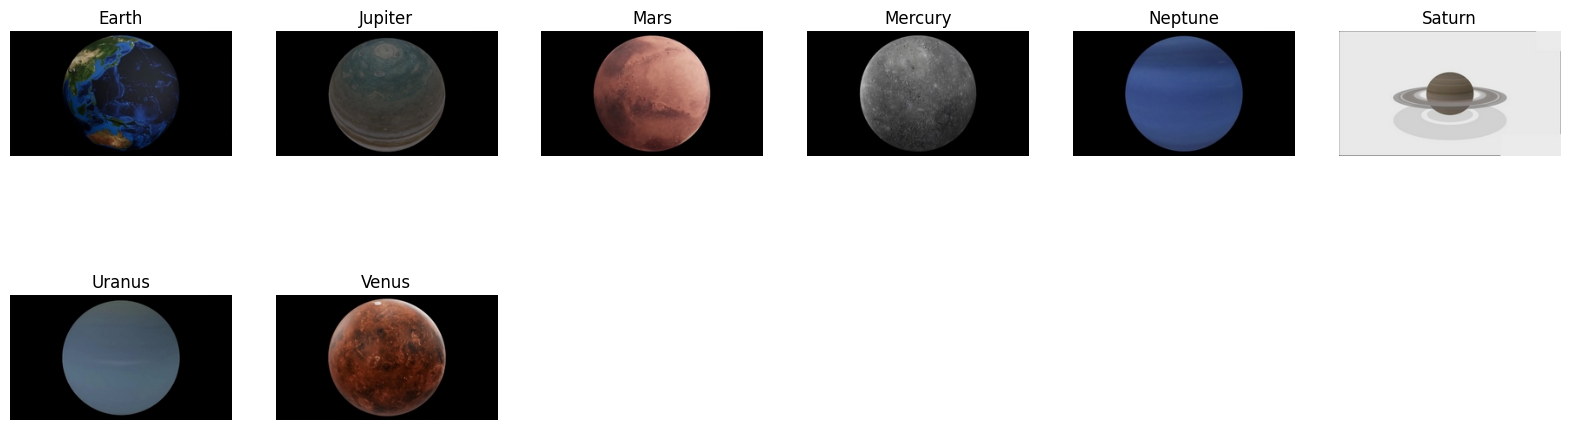

In [ ]:
plt.figure(figsize = (20, 20))
for labels, number in training_set.class_indices.items():
    plt.subplot(6, 6, number+1)
    showImages(labels)

In [ ]:
# printing class labels for each planet
test_set.class_indices

{'Earth': 0,
 'Jupiter': 1,
 'Mars': 2,
 'Mercury': 3,
 'Neptune': 4,
 'Saturn': 5,
 'Uranus': 6,
 'Venus': 7}

# Creating a List of Planets and Classes

In [ ]:
# create a lookup table for all the planets
# class_indicies have the numeric tag for each balls
TrainClasses = training_set.class_indices

# Storing the face and numeric tag for future reference
ResultMap={}
for planetValue, planetName in zip(TrainClasses.values(), TrainClasses.keys()):
    ResultMap[planetValue] = planetName

# Saving the face map for future reference
import pickle
with open("/content/drive/MyDrive/scai_project_fall2024/ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID", ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons = len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'Earth', 1: 'Jupiter', 2: 'Mars', 3: 'Mercury', 4: 'Neptune', 5: 'Saturn', 6: 'Uranus', 7: 'Venus'}

 The Number of output neurons:  8


# Creating the CNN Model

In [ ]:
# create cnn deep learning model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

# initialize
planet_classifier = Sequential()

# convolution
''' convolution notes:
convolution helps detect patterns in the images,
every image is passed through multiple filters,
the filters are strategically defined matrices
that help to detect a particular pattern,
images are taken through filters and transposed to
a smaller form which keep all of the information,
32 is the number of filters which will help detect
32 different patterns,
kernel size is the size of the filters,
strides how much the filter is moved.
'''
planet_classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128, 128, 3), activation='relu'))

# max pooling
''' max pooling notes:
reduces values based on max,
reduces dimension of image keeping the most relevant
(largest) piece of data
'''
planet_classifier.add(MaxPool2D(pool_size=(2, 2)))

# additional layer for increased accuracy
''' more notes:
add more filters to detect more complex patterns
for size (128, 128, 3) the 3 refers to RGB
'''
planet_classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
planet_classifier.add(MaxPool2D(pool_size=(2, 2)))

# flattening
''' flattening notes:
here we are flattening the 3 of the RGB
'''
planet_classifier.add(Flatten())

# fully connected layers
planet_classifier.add(Dense(256, activation='relu'))
planet_classifier.add(Dense(OutputNeurons, activation='softmax'))

# compile
planet_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
planet_classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,767,304 (56.33 MB)

 Trainable params: 14,767,304 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

# Fitting the Model

In [ ]:
import time

# measure the time taken by the model to train
StartTime = time.time()

# start model training
# Ensure `valid_set` yields data and matches the model's output shape.
# Check if `valid_set` has a sufficient number of samples and is properly configured.
# Also check for class imbalance or incorrect labels in `valid_set`.

# If `len(valid_set)` is 0, it can cause the issue
# Calculate steps_per_epoch and validation_steps based on the number of samples
# in training_set and valid_set respectively.

num_training_samples = len(training_set.filepaths)  # or training_set.samples
num_validation_samples = len(valid_set.filepaths)  # or valid_set.samples
batch_size = training_set.batch_size  # Assuming same batch size for both

steps_per_epoch = num_training_samples // batch_size
validation_steps = num_validation_samples // batch_size

model_history = planet_classifier.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,  # Changed to calculated value
    epochs=6,
    validation_data=valid_set,
    validation_steps=validation_steps,  # Changed to calculated value
    verbose=1)

EndTime = time.time()
print("Model Training Time: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.6760 - loss: 0.9519 - val_accuracy: 1.0000 - val_loss: 0.0261
Epoch 2/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0374 - val_accuracy: 1.0000 - val_loss: 0.0298
Epoch 3/6


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.9698 - loss: 0.0669 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 4/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 5/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.9885 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 9.0702e-04
Model Training Time:  1 Minutes


In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

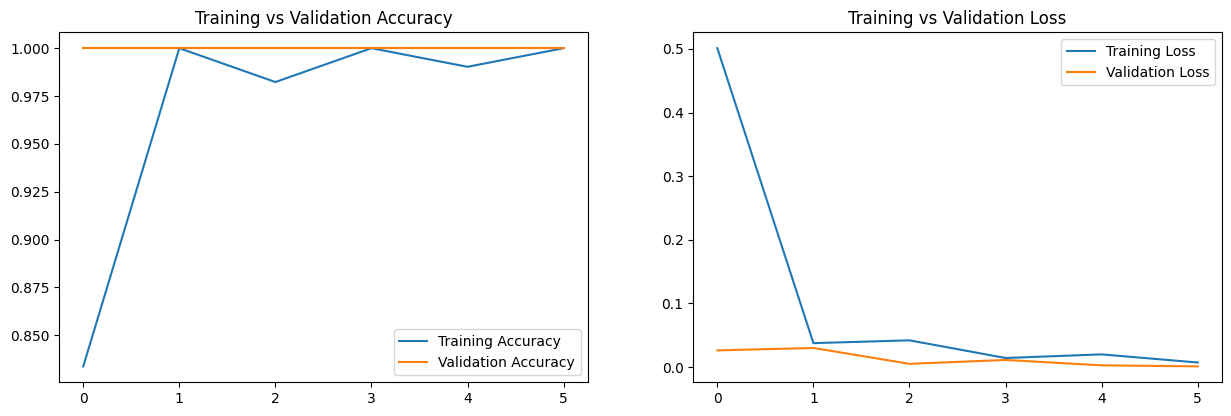

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

# Saving the Model

In [ ]:
planet_classifier.save('/content/drive/MyDrive/scai_project_fall2024/classifier.keras') # Change the file extension to .keras or .h5

# Testing the Model on Test Dataset

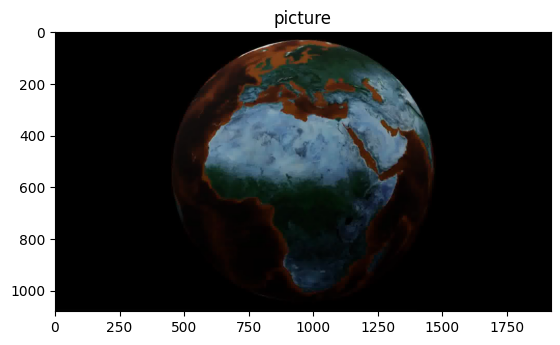

Prediction is:  Earth


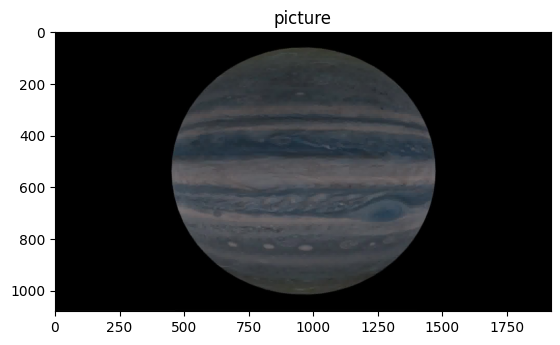

Prediction is:  Jupiter


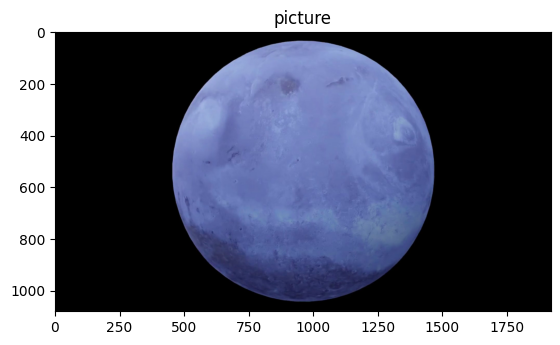

Prediction is:  Mars


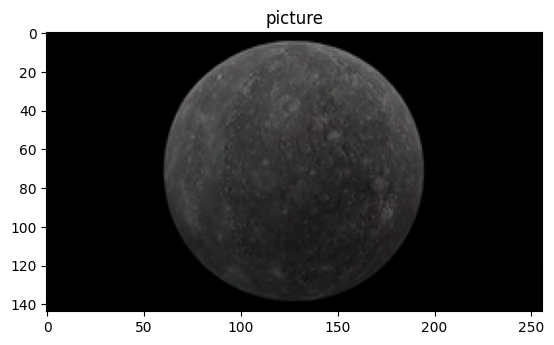

Prediction is:  Mercury


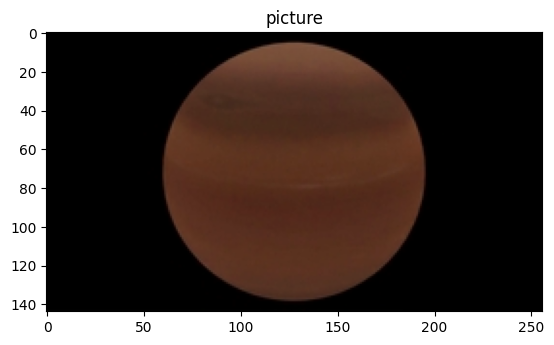

Prediction is:  Neptune


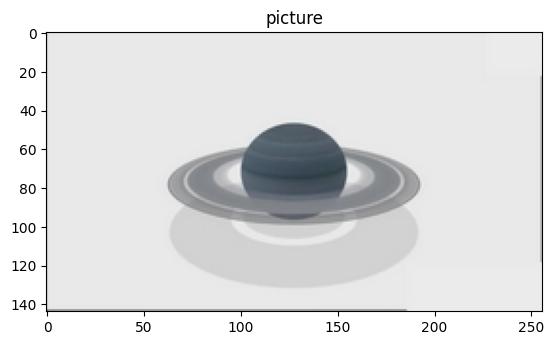

Prediction is:  Saturn


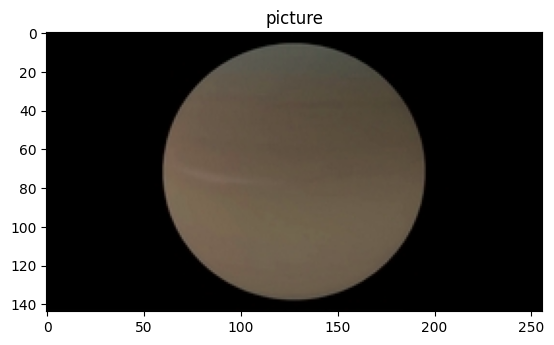

Prediction is:  Uranus


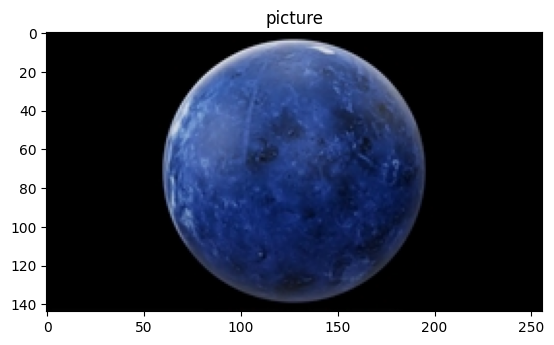

Prediction is:  Venus


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

# loop to test images using test data
test_planet_names = ['Earth', 'Jupiter', 'Mars', 'Mercury', 'Neptune', 'Saturn', 'Uranus', 'Venus']

for i in range(len(test_planet_names)):
    testImage = '/content/drive/MyDrive/scai_project_fall2024/test/'+ test_planet_names[i] +'/'+ test_planet_names[i] +'.jpg' # Store the image path
    test_image = load_img(testImage, target_size=(128, 128))  # Use the path to load and resize
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = planet_classifier.predict(test_image, verbose=0)

    img = cv2.imread(testImage) # Use the original path for cv2

    plt.imshow(img)
    plt.title('picture')
    plt.show()

    print('Prediction is: ', ResultMap[np.argmax(result)])

# Testing Model on Random Images From the Internet

In [ ]:
# function to test on any image given the path in drive
from tensorflow.keras.utils import load_img, img_to_array

def test_classifier_on_image(path):
    testImage = path # Store the image path
    test_image = load_img(testImage, target_size=(128, 128))  # Use the path to load and resize
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = planet_classifier.predict(test_image, verbose=0)

    img = cv2.imread(testImage) # Use the original path for cv2

    plt.imshow(img)
    plt.title('picture')
    plt.show()

    print('Prediction is: ', ResultMap[np.argmax(result)])

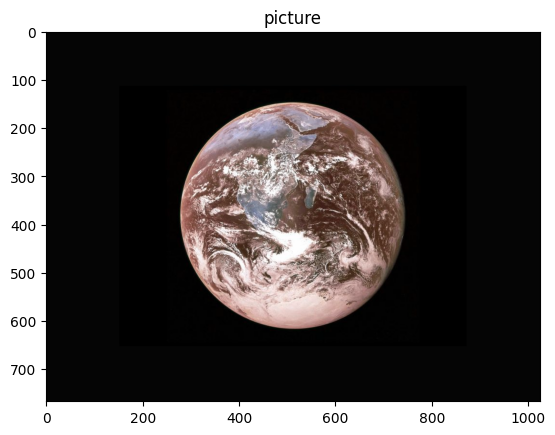

Prediction is:  Earth


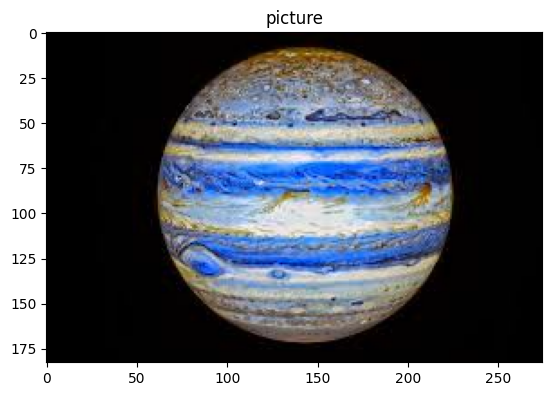

Prediction is:  Jupiter


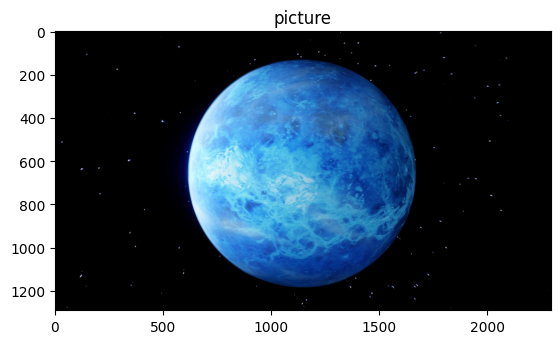

Prediction is:  Venus


In [ ]:
# testing on 3 random images
# images are of Earth, Jupiter, and Venus respectively
test_classifier_on_image('/content/drive/MyDrive/scai_project_fall2024/additional_tests/ear.jpg')
test_classifier_on_image('/content/drive/MyDrive/scai_project_fall2024/additional_tests/jup.jpeg')
test_classifier_on_image('/content/drive/MyDrive/scai_project_fall2024/additional_tests/ven.jpg')

In [ ]:
test_classifier_on_image('/content/drive/MyDrive/scai_project_fall2024/additional_tests/mars.jpeg')

NameError: name 'planet_classifier' is not defined